link to data: https://www.instacart.com/datasets/grocery-shopping-2017

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
order_train = pd.read_csv('../instacart/order_products__train.csv')
order_prior = pd.read_csv('../instacart/order_products__prior.csv')
aisles = pd.read_csv('../instacart/aisles.csv')
departments = pd.read_csv('../instacart/departments.csv')
products = pd.read_csv('../instacart/products.csv')
orders = pd.read_csv('../instacart/orders.csv')

In [6]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
aisles.shape

(134, 2)

In [8]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
departments.shape

(21, 2)

In [10]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [11]:
products.shape

(49688, 4)

# Observations
- 134 aisles
- 21 departments
- 49688 products

In [12]:
# Merging products dataframe and aisles dataframe based on common column aisle_id to create temp dataframe merge1
merge1 = pd.merge(products, aisles)

In [13]:
# Merging merge1 dataframe and dept dataframe based on common column department_id to create temp dataframe merge2
merge2 = pd.merge(merge1, departments)

In [14]:
# merge temp dataframe merge2 and order_prod dataframe on common column product_id to create full dataframe insta
orders_prior_merge = pd.merge(merge2, order_prior)

In [15]:
# getting the top five columns of insta
orders_prior_merge.head()

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1107,7,0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,5319,3,1
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,7540,4,1
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,9228,2,0
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,9273,30,0


In [16]:
orders_prior_merge.shape

(32434489, 9)

In [17]:
orders_prior_merge.dtypes

product_id            int64
product_name         object
aisle_id              int64
department_id         int64
aisle                object
department           object
order_id              int64
add_to_cart_order     int64
reordered             int64
dtype: object

In [18]:
orders_prior_merge.sort_values('order_id')

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered
3380657,1819,All Natural No Stir Creamy Almond Butter,88,13,spreads,pantry,2,8,1
23758646,28985,Michigan Organic Kale,83,4,fresh vegetables,produce,2,2,1
2932465,9327,Garlic Powder,104,13,spices seasonings,pantry,2,3,0
4300574,30035,Natural Sweetener,17,13,baking ingredients,pantry,2,5,0
15422009,33120,Organic Egg Whites,86,16,eggs,dairy eggs,2,1,1
3883353,45918,Coconut Butter,19,13,oils vinegars,pantry,2,4,1
21776628,43668,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce,2,9,0
3251811,40141,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,pantry,2,7,1
22857095,17794,Carrots,83,4,fresh vegetables,produce,2,6,1
24968369,46667,Organic Ginger Root,83,4,fresh vegetables,produce,3,6,1


In [19]:
orders_prior_merge.isnull().sum()

product_id           0
product_name         0
aisle_id             0
department_id        0
aisle                0
department           0
order_id             0
add_to_cart_order    0
reordered            0
dtype: int64

In [21]:
orders_prior_merge.duplicated().sum()

0

In [48]:
# Top orders by aisle
orders_prior_merge.groupby('aisle').aisle.count().sort_values(ascending = False)

aisle
fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
refrigerated                      575881
frozen produce                    522654
ice cream ice                     498425
crackers                          458838
energy granola bars               456386
eggs                              452134
lunch meat                        395130
frozen meals                      390299
baby food formula                 382456
fresh herbs                       377741
cereal                            377586
soft drinks                       357537
fresh dips tapenades              355685
soup broth bouillon               346464
juice nect

In [49]:
# took a sample to take a look and speed up performance
insta_samp = orders_prior_merge.sample(n=100)

In [50]:
insta_samp

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered
22499247,10621,Organic Purple Kale,83,4,fresh vegetables,produce,1294425,7,0
21699640,42265,Organic Baby Carrots,123,4,packaged vegetables fruits,produce,1226105,1,1
6620840,35842,Organic Lemon Cayenne Sparkling Probiotic Drink,31,7,refrigerated,beverages,3221618,3,1
12915511,42828,Whipped Cream Cheese,108,16,other creams cheeses,dairy eggs,612905,14,0
30235655,20574,Roasted Turkey,96,20,lunch meat,deli,1937240,9,0
20726124,21903,Organic Baby Spinach,123,4,packaged vegetables fruits,produce,1168002,6,1
10794916,24799,Vanilla Skyr Nonfat Yogurt,120,16,yogurt,dairy eggs,1647145,4,1
2871994,37710,Trail Mix,125,19,trail mix snack mix,snacks,326833,7,0
6209266,3957,100% Raw Coconut Water,31,7,refrigerated,beverages,153234,12,1
19746845,3561,Flat Fillets of Anchovies,95,15,canned meat seafood,canned goods,1804542,18,0


In [51]:
orders_prior_merge.describe(include=['object'])

,product_name,aisle,department
count,32434489,32434489,32434489
unique,49677,134,21
top,Banana,fresh fruits,produce
freq,472565,3642188,9479291


In [52]:
# Drop unneeded ID columns to increase performance
orders_prior_merge.drop(['product_id','aisle_id','department_id'], axis = 1)

,product_name,aisle,department,order_id,add_to_cart_order,reordered
0,Chocolate Sandwich Cookies,cookies cakes,snacks,1107,7,0
1,Chocolate Sandwich Cookies,cookies cakes,snacks,5319,3,1
2,Chocolate Sandwich Cookies,cookies cakes,snacks,7540,4,1
3,Chocolate Sandwich Cookies,cookies cakes,snacks,9228,2,0
4,Chocolate Sandwich Cookies,cookies cakes,snacks,9273,30,0
5,Chocolate Sandwich Cookies,cookies cakes,snacks,9696,5,1
6,Chocolate Sandwich Cookies,cookies cakes,snacks,11140,1,1
7,Chocolate Sandwich Cookies,cookies cakes,snacks,11485,4,0
8,Chocolate Sandwich Cookies,cookies cakes,snacks,12672,3,1
9,Chocolate Sandwich Cookies,cookies cakes,snacks,13668,4,1


In [53]:
# Which orders had the most items ordered
orders_prior_merge.groupby('order_id').order_id.count().sort_values(ascending = False).head()

order_id
1564244    145
790903     137
61355      127
2970392    121
2069920    116
Name: order_id, dtype: int64

In [54]:
# Top items that were added to cart first by user
orders_prior_merge[orders_prior_merge.add_to_cart_order == 1].groupby('product_name').product_name.count().sort_values(ascending = False).head(100)

product_name
Banana                                         110916
Bag of Organic Bananas                          78988
Organic Whole Milk                              30927
Organic Strawberries                            27975
Organic Hass Avocado                            24116
Organic Baby Spinach                            23543
Organic Avocado                                 22398
Spring Water                                    16822
Strawberries                                    16366
Organic Raspberries                             14393
Sparkling Water Grapefruit                      13733
Organic Half & Half                             12676
Large Lemon                                     12316
Soda                                            11770
Organic Reduced Fat Milk                         9885
Limes                                            9719
Half & Half                                      9528
Hass Avocados                                    9500
Organic Reduced

In [22]:
# Top 10 ordered products
orders_prior_merge[orders_prior_merge.add_to_cart_order == 1].groupby('product_name').product_name.count().sort_values(ascending = False).head(10)

product_name
Banana                    110916
Bag of Organic Bananas     78988
Organic Whole Milk         30927
Organic Strawberries       27975
Organic Hass Avocado       24116
Organic Baby Spinach       23543
Organic Avocado            22398
Spring Water               16822
Strawberries               16366
Organic Raspberries        14393
Name: product_name, dtype: int64

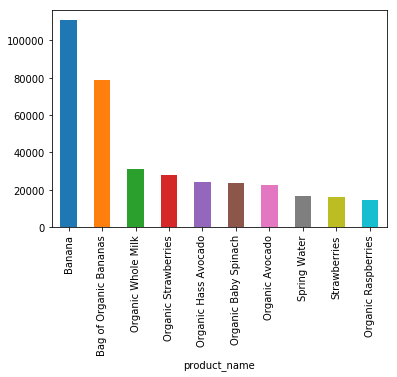

In [24]:
# Top 10 ordered products plot
orders_prior_merge[orders_prior_merge.add_to_cart_order == 1].groupby('product_name').product_name.count().sort_values(ascending = False).head(10).plot(kind='bar')

In [55]:
# Top ordered foods total
orders_prior_merge.groupby('product_name').product_name.count().sort_values(ascending = False)

product_name
Banana                                                                                                                472565
Bag of Organic Bananas                                                                                                379450
Organic Strawberries                                                                                                  264683
Organic Baby Spinach                                                                                                  241921
Organic Hass Avocado                                                                                                  213584
Organic Avocado                                                                                                       176815
Large Lemon                                                                                                           152657
Strawberries                                                                                                    

In [25]:
top_aisle = print(orders_prior_merge.groupby('aisle').product_name.head(1))

0                                  Chocolate Sandwich Cookies
234065                          Mint Chocolate Flavored Syrup
245267                Salted Caramel Lean Protein & Fiber Bar
701653                          Nacho Cheese White Bean Chips
1424123           Organic Sourdough Einkorn Crackers Rosemary
1882961                            Healthy Pop Butter Popcorn
2046485                  Medium Taqueria Style Chipotle Salsa
2222242                               Sun Cups Dark Chocolate
2522809                        Extra Spearmint Sugar-Free Gum
2545473                           Dried Sweetened Cranberries
2851960     Cranberry Almond Fruit Clusters Dried Cranberries
2887550                                      All-Seasons Salt
3099642                             Green Chile Anytime Sauce
3162152                                    Pumpkin Muffin Mix
3268241         Organic Red Wine & Olive Oil Dressing Organic
3367572                                     Jelly, Blackberry
3656972 

aisle
fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
refrigerated                      575881
frozen produce                    522654
ice cream ice                     498425
crackers                          458838
energy granola bars               456386
eggs                              452134
lunch meat                        395130
frozen meals                      390299
baby food formula                 382456
fresh herbs                       377741
Name: aisle, dtype: int64


Text(0.5,1,'Top 20 Aisles by Order')

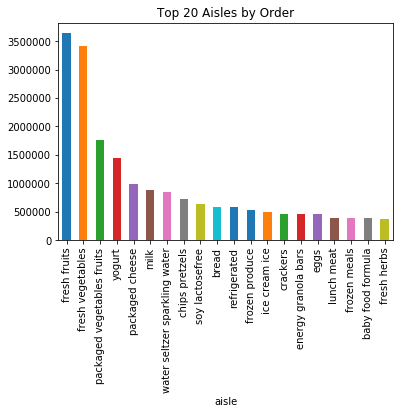

In [27]:
# Top 20 aisles by Order
print(orders_prior_merge.groupby('aisle').aisle.count().sort_values(ascending = False).head(20))
orders_prior_merge.groupby('aisle').aisle.count().sort_values(ascending = False).head(20).plot(kind='bar');
plt.title('Top 20 Aisles by Order')

department
produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447123
babies              423802
international       269253
alcohol             153696
pets                 97724
missing              69145
other                36291
Name: department, dtype: int64


Text(0.5,1,'Top 20 Departments by Order')

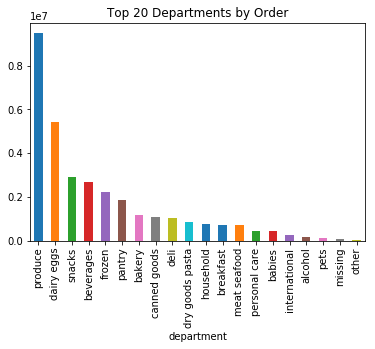

In [28]:
# Top 20 Departments by Order
print(orders_prior_merge.groupby('department').department.count().sort_values(ascending = False).head(20))
orders_prior_merge.groupby('department').department.count().sort_values(ascending = False).head(20).plot(kind='bar');
plt.title('Top 20 Departments by Order')

In [29]:
orders_prior_merge.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'aisle',
       'department', 'order_id', 'add_to_cart_order', 'reordered'],
      dtype='object')

product_name
Banana                      472565
Bag of Organic Bananas      379450
Organic Strawberries        264683
Organic Baby Spinach        241921
Organic Hass Avocado        213584
Organic Avocado             176815
Large Lemon                 152657
Strawberries                142951
Limes                       140627
Organic Whole Milk          137905
Organic Raspberries         137057
Organic Yellow Onion        113426
Organic Garlic              109778
Organic Zucchini            104823
Organic Blueberries         100060
Cucumber Kirby               97315
Organic Fuji Apple           89632
Organic Lemon                87746
Apple Honeycrisp Organic     85020
Organic Grape Tomatoes       84255
Name: product_name, dtype: int64


Text(0.5,1,'Top 20 Products by Order')

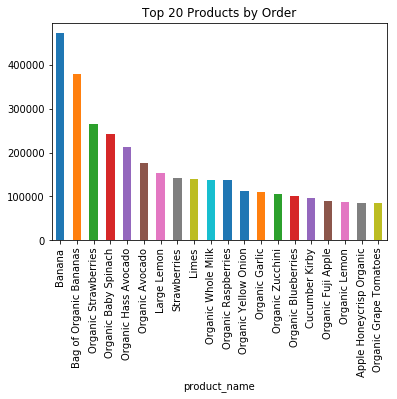

In [30]:
# Top 20 Products by Order
print(orders_prior_merge.groupby('product_name').product_name.count().sort_values(ascending = False).head(20))
orders_prior_merge.groupby('product_name').product_name.count().sort_values(ascending = False).head(20).plot(kind='bar');
plt.title('Top 20 Products by Order')

In [ ]:
order_prior.head()

In [ ]:
order_train.head()

In [ ]:
orders.shape

In [ ]:
print('prior_orders:', prior_orders.shape, 
      'train_orders:',train_orders.shape, 
      'test_orders:',test_orders.shape)

In [56]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


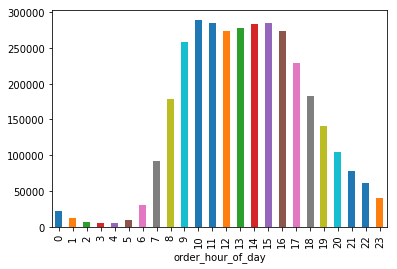

In [64]:
# Order Count by Hour
orders.groupby('order_hour_of_day').order_id.count().plot(kind = 'bar');

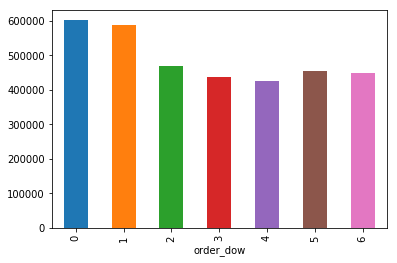

In [65]:
# Order Count by Day
orders.groupby('order_dow').order_id.count().plot(kind = 'bar');